# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [110]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc, confusion_matrix, f1_score, ConfusionMatrixDisplay,precision_recall_curve, classification_report, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import tree
import seaborn as sns

In [111]:
#Read our data into a dataframe
df = pd.read_csv('datasets/data.csv')
df.shape

(6819, 96)

In [112]:
#looking at the dataset
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


Bankrupt?
0    6599
1     220
Name: count, dtype: int64
Bankrupt?
0    0.967737
1    0.032263
Name: count, dtype: float64


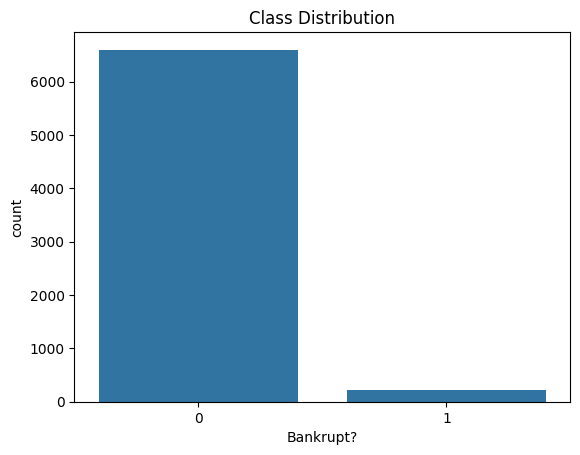

In [113]:
#Class distribution
class_distribution = df['Bankrupt?'].value_counts()
print(class_distribution)

# Calculate proportions
class_proportions = class_distribution / len(df)
print(class_proportions)

sns.countplot(x='Bankrupt?', data=df)
plt.title('Class Distribution')
plt.show()
#Checking whether the data set is balanced

In [114]:
y = df["Bankrupt?"]
x = df.drop(columns=["Bankrupt?"])

#Splitting the datasets into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(x_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': model.feature_importances_
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                                   Feature  Importance
29                   Net Value Growth Rate    0.027424
89      Net Income to Stockholder's Equity    0.025121
42   Net profit before tax/Paid-in capital    0.024984
15                 Net Value Per Share (B)    0.021524
85              Net Income to Total Assets    0.020624
..                                     ...         ...
25        After-tax Net Profit Growth Rate    0.005196
44                    Total Asset Turnover    0.004995
14                            Tax rate (A)    0.002146
84                   Liability-Assets Flag    0.000052
93                         Net Income Flag    0.000000

[95 rows x 2 columns]


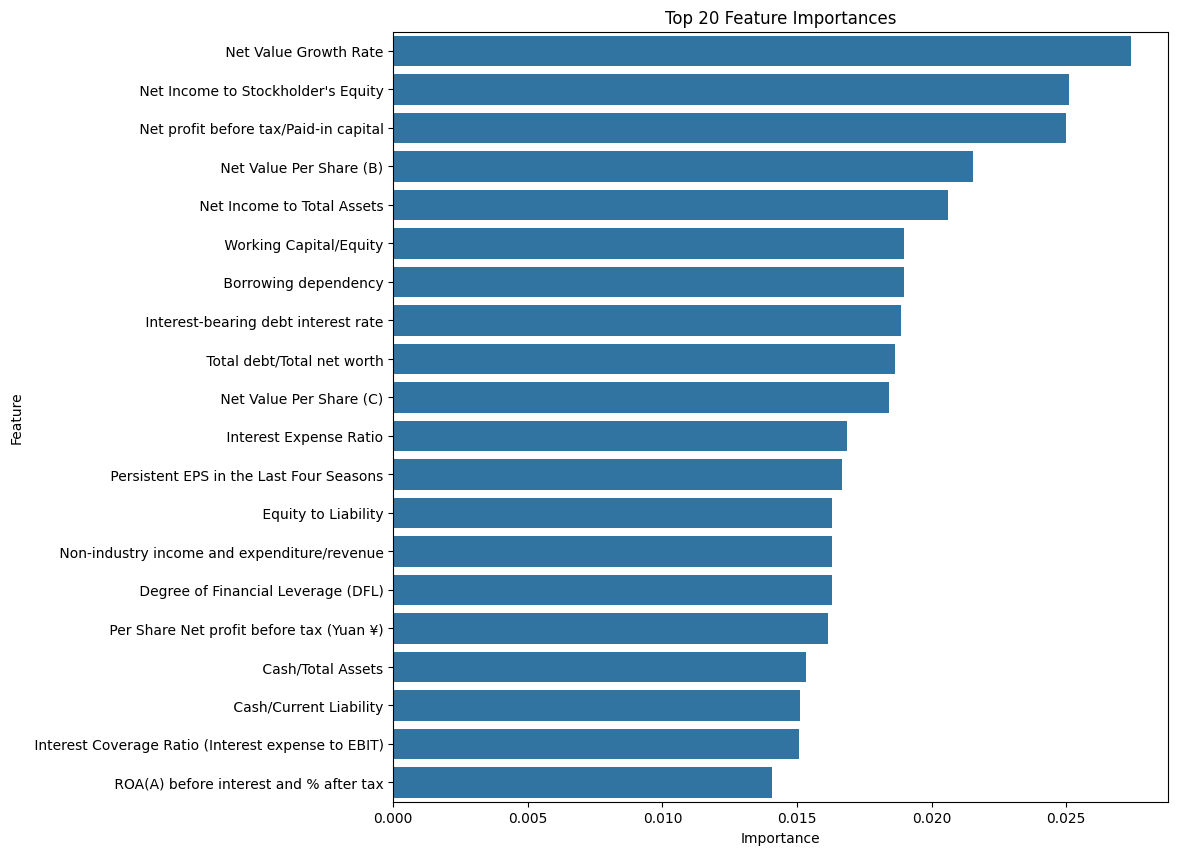

In [115]:
#Visualising the important features
plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(20))  # Top 20 features
plt.title('Top 20 Feature Importances')
plt.show()

In [116]:
# Select the top 20 features
top_20_features = feature_importances.head(20)['Feature']

# Filter the dataset
x_train_top20 = x_train[top_20_features]
x_test_top20 = x_test[top_20_features]

In [117]:
# Retrain the model using only the top 20 features
model_top20 = RandomForestClassifier(random_state=42)
model_top20.fit(x_train_top20, y_train)

# Generate Predictions
y_pred = model_top20.predict(x_test_top20)
y_pred_proba = model_top20.predict_proba(x_test_top20)[:, 1]


Top 20 Features Performance Metrics:
AUC Score: 0.901
PR-AUC Score: 0.509
F1 Score: 0.319

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.61      0.22      0.32        51

    accuracy                           0.97      1364
   macro avg       0.79      0.61      0.65      1364
weighted avg       0.96      0.97      0.96      1364



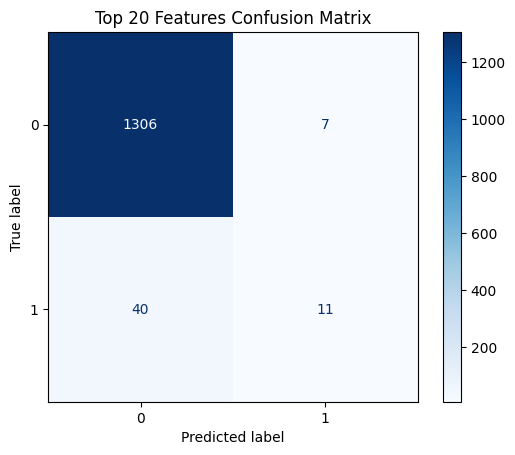

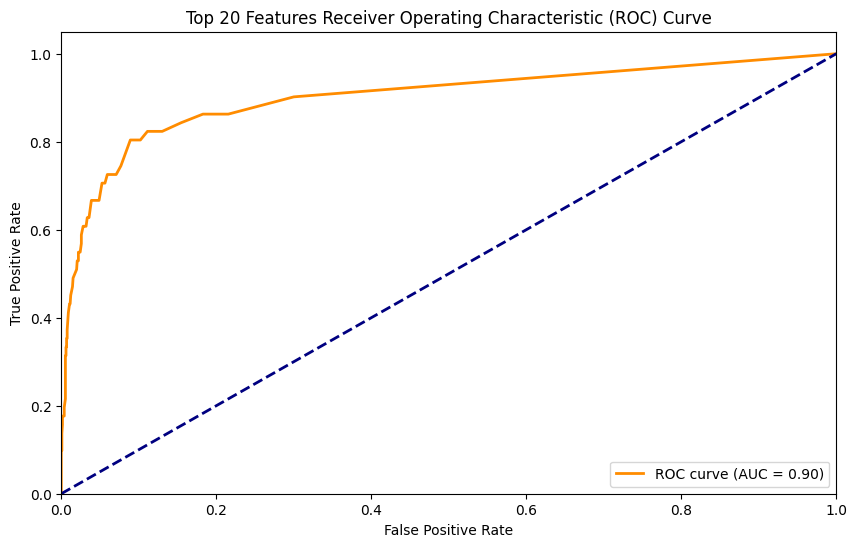

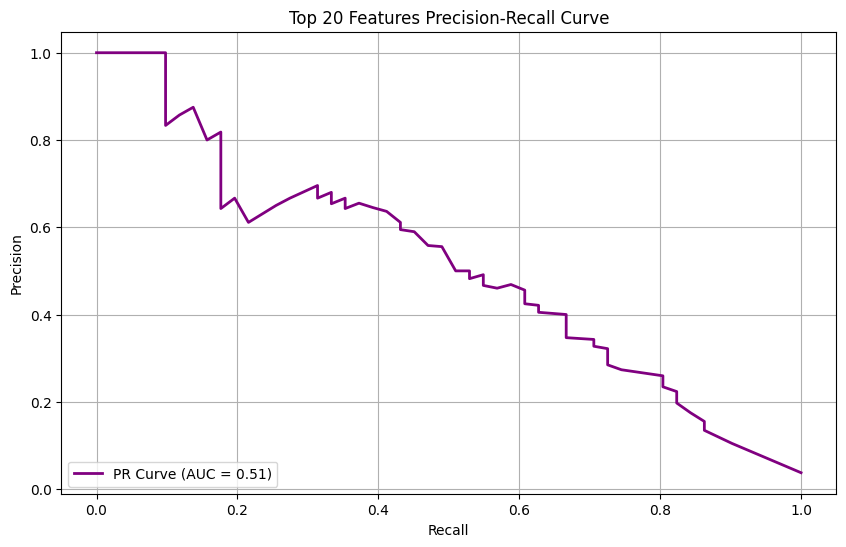

In [118]:
#Combining the metrics into the function
def evaluate_model(y_test, y_pred, y_pred_proba, model_name="Model"):
    # ROC-AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # PR-AUC
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    # F1 Score
    f1 = f1_score(y_test, y_pred)

    # Print Metrics
    print(f"\n{model_name} Performance Metrics:")
    print(f"AUC Score: {roc_auc:.3f}")
    print(f"PR-AUC Score: {pr_auc:.3f}")
    print(f"F1 Score: {f1:.3f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Create and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color='purple', lw=2, label=f'PR Curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.grid()
    plt.show()

#Evaluating the model(filtered)
evaluate_model(y_test, y_pred, y_pred_proba, model_name="Top 20 Features")

Optimal Threshold: 0.23 (F1 Score: 0.522)

Threshold-Tuned Model Performance Metrics:
AUC Score: 0.901
PR-AUC Score: 0.509
F1 Score: 0.522

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1313
           1       0.47      0.59      0.52        51

    accuracy                           0.96      1364
   macro avg       0.73      0.78      0.75      1364
weighted avg       0.96      0.96      0.96      1364



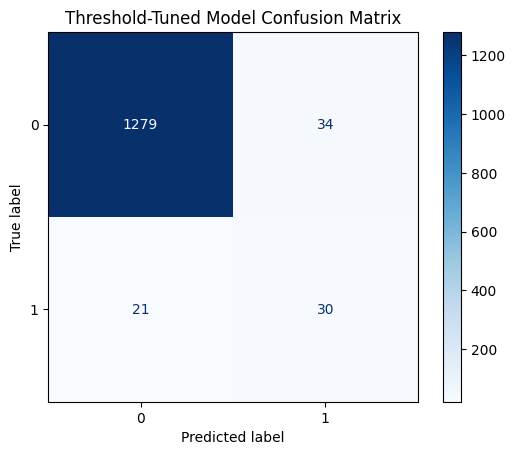

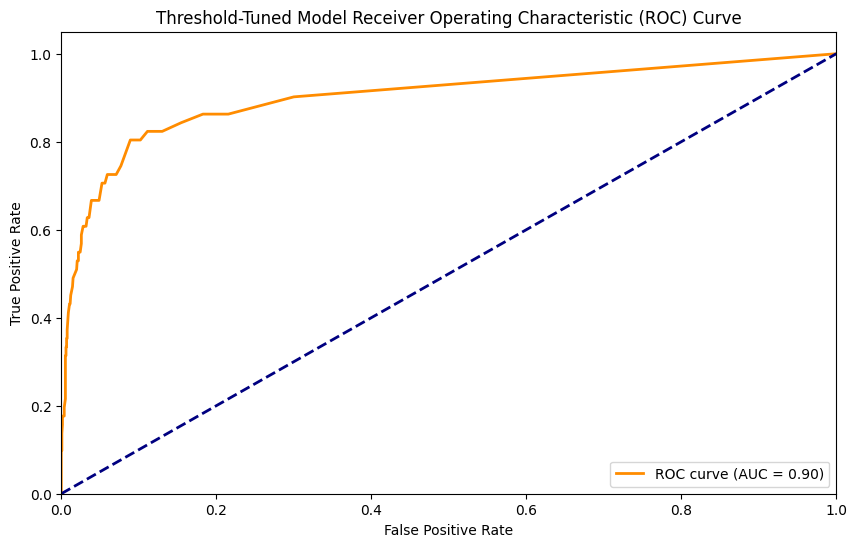

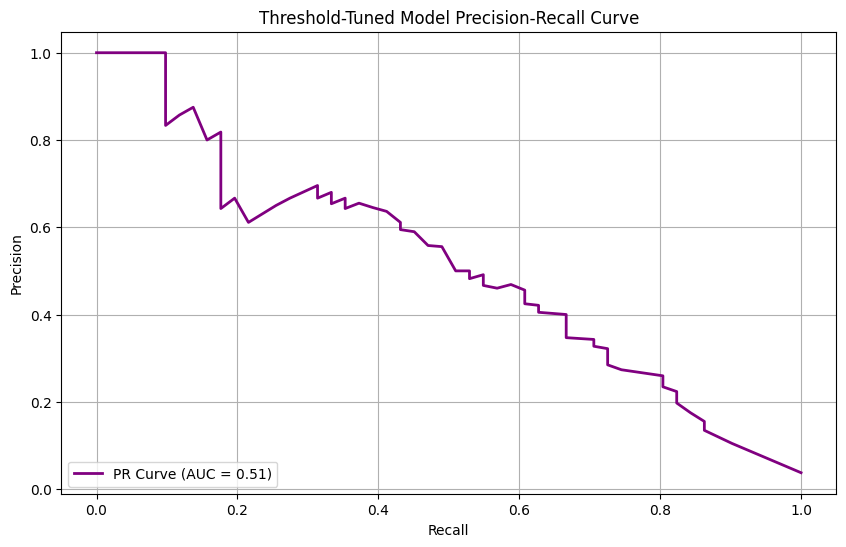

In [119]:
#Adding the threshold tuning for a more optimal performance model
# Define thresholds
thresholds = np.linspace(0, 1, 100)

# Find optimal threshold
best_threshold, best_f1 = 0, 0
for threshold in thresholds:
    y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_adjusted)
    if f1 > best_f1:
        best_f1, best_threshold = f1, threshold

print(f"Optimal Threshold: {best_threshold:.2f} (F1 Score: {best_f1:.3f})")

# Evaluate model with adjusted threshold
y_pred_adjusted = (y_pred_proba >= best_threshold).astype(int)
evaluate_model(y_test, y_pred_adjusted, y_pred_proba, model_name="Threshold-Tuned Model")


In [124]:
cv_scores = cross_val_score(model_top20, x_train_top20, y_train, cv=30, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean():.3f}")

Cross-Validation F1 Scores: [0.57142857 0.         0.28571429 0.         0.28571429 0.33333333
 0.5        0.25       0.5        0.25       0.5        0.2
 0.28571429 0.         0.25       0.22222222 0.2        0.8
 0.         0.5        0.         0.22222222 0.25       0.28571429
 0.5        0.         0.         0.33333333 0.33333333 0.5       ]
Mean CV F1 Score: 0.279



All Features Performance Metrics:
AUC Score: 0.925
PR-AUC Score: 0.551
F1 Score: 0.267

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.89      0.16      0.27        51

    accuracy                           0.97      1364
   macro avg       0.93      0.58      0.63      1364
weighted avg       0.97      0.97      0.96      1364



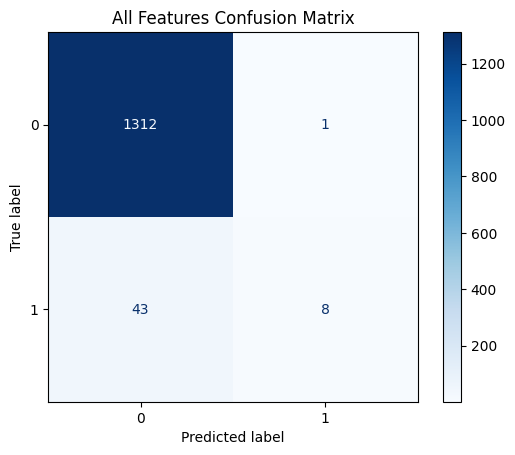

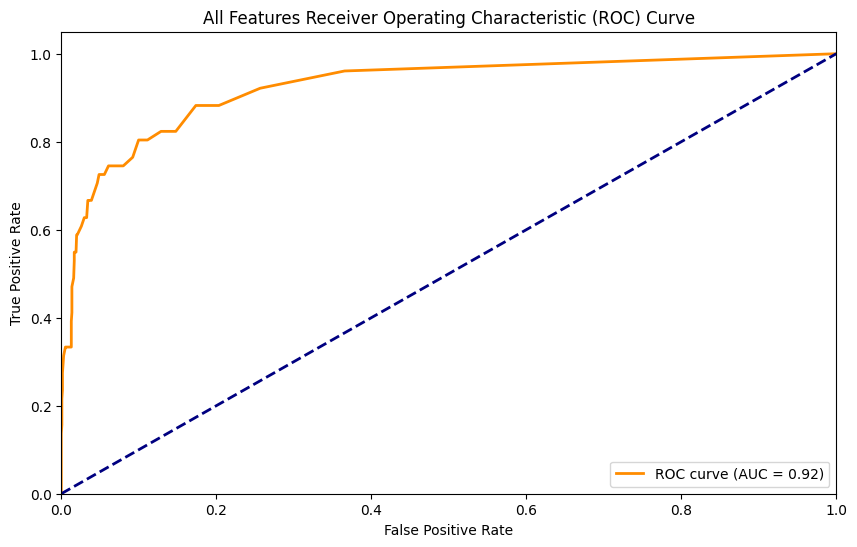

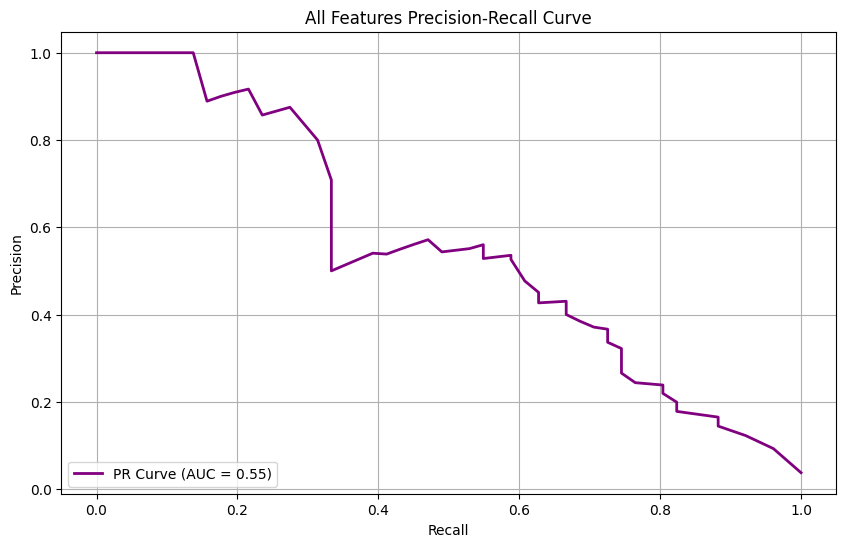

In [121]:
# Train on all features
model_all = RandomForestClassifier()
model_all.fit(x_train, y_train)

# Generate Predictions
y_pred_all = model_all.predict(x_test)
y_pred_proba_all = model_all.predict_proba(x_test)[:, 1]

#Evaluating the model(All features)
evaluate_model(y_test, y_pred_all, y_pred_proba_all, model_name="All Features")
